# Movilidad Sustentable
## Ciencia de Datos e Inteligencia de Negocios


### Configuración

In [3]:
"""
Bicicletas: Recorridos
Clima: PRCP TAVG TEMP[C] HUM[%] PNM[hPa] DD[gr] FF[km/hr]                                                 
2020-2021
Data acquisition & wrangling
"""

import os
import sys
import urllib.request

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime
from datetime import date, timedelta
import re

datadir = 'datasets/'

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount(
      '/content/drive/', 
    )
    if drive:
        datadir = '/content/drive/MyDrive/Academicos/UTN/BI/datasets/'
else:
    print('Not running on CoLab')

Not running on CoLab


In [4]:
datasets = {
  "recorridos" : {
    "df"     : pd.DataFrame(),
    "local"  : datadir + 'recorridos.csv',
  },
  "estaciones" : {
    "df"     : pd.DataFrame(),
    "local"  : datadir + 'estaciones.csv',
  }
}

In [5]:
"""
Cargar insumos
"""
def cargar_insumos( insumos ):
    for i in insumos:
#         if not os.path.exists( insumos[i]["local"] ):
#             print("Descargando:", insumos[i]["remote"])
#             urllib.request.urlretrieve(
#               insumos[i]["remote"],
#               insumos[i]["local"]
#             )
        if "zip" in insumos[i]["local"]:
            insumos[i]["df"] = pd.read_csv(
                insumos[i]["local"],
                compression = 'zip',
                encoding = 'utf-8', 
            )
        if "csv" in insumos[i]["local"]:
            insumos[i]["df"] = pd.read_csv(
                insumos[i]["local"],
            )
        if "xlsx" in insumos[i]["local"]:
            insumos[i]["df"] = pd.read_excel(
                insumos[i]["local"],
            )
        print( 'Cargado: ', insumos[i]["local"] )
    return insumos

In [6]:
insumos = cargar_insumos( datasets )

Cargado:  datasets/recorridos.csv
Cargado:  datasets/estaciones.csv


## Exploracion

### Gruping

In [13]:
datasets['recorridos']['df']

,duracion,usuario_id,origen_id,origen_nombre,origen_fecha,origen_direccion,destino_id,destino_nombre,destino_fecha,fecha,...,velocidad_cat,DD,FF,HUM,PNM,TEMP,PRCP,TAVG,TMAX,TMIN
0,882,666202,116,HOSPITAL ALEMÁN,2020-12-31 23:54:22,BERUTI & ECUADOR,142,ARMENIA Y GORRITI,2021-01-01 00:09:04,2020-12-31,...,0.0,320.0,17.0,45.0,1013.2,22.7,6.710092,22.3,24.549318,15.200000
1,894,332689,116,HOSPITAL ALEMÁN,2020-12-29 12:39:18,BERUTI & ECUADOR,142,ARMENIA Y GORRITI,2020-12-29 12:54:12,2020-12-29,...,0.0,50.0,11.0,70.0,1008.6,26.4,0.000000,26.1,30.100000,23.500000
2,1361,57949,116,HOSPITAL ALEMÁN,2020-12-21 21:21:38,BERUTI & ECUADOR,142,ARMENIA Y GORRITI,2020-12-21 21:44:19,2020-12-21,...,0.0,90.0,13.0,71.0,1016.3,21.1,6.710092,19.6,23.800000,15.440816
3,1010,454846,116,HOSPITAL ALEMÁN,2020-12-20 21:58:19,BERUTI & ECUADOR,142,ARMENIA Y GORRITI,2020-12-20 22:15:09,2020-12-20,...,0.0,200.0,7.0,38.0,1014.0,20.5,6.710092,18.6,27.200000,13.600000
4,1490,690975,116,HOSPITAL ALEMÁN,2020-12-20 13:32:53,BERUTI & ECUADOR,142,ARMENIA Y GORRITI,2020-12-20 13:57:43,2020-12-20,...,0.0,230.0,20.0,39.0,1012.1,20.6,6.710092,18.6,27.200000,13.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331627,690,62246,292,PLAZA BOLIVIA,2021-01-01 00:09:43,CODE,44,ECOPARQUE,2021-01-01 00:21:13,2021-01-01,...,0.0,320.0,15.0,44.0,1013.5,22.0,6.710092,25.3,24.549318,20.300000
3331628,1360,445201,79,AZUCENA VILLAFLOR,2021-01-01 00:08:40,CODE,168,ESTADOS UNIDOS,2021-01-01 00:31:20,2021-01-01,...,0.0,320.0,15.0,44.0,1013.5,22.0,6.710092,25.3,24.549318,20.300000
3331629,1169,554162,79,AZUCENA VILLAFLOR,2021-01-01 00:08:37,CODE,8,CONGRESO,2021-01-01 00:28:06,2021-01-01,...,0.0,320.0,15.0,44.0,1013.5,22.0,6.710092,25.3,24.549318,20.300000
3331630,1031,51005,79,AZUCENA VILLAFLOR,2021-01-01 00:06:50,CODE,75,PLAZA PRIMERO DE MAYO,2021-01-01 00:24:01,2021-01-01,...,0.0,320.0,15.0,44.0,1013.5,22.0,6.710092,25.3,24.549318,20.300000


In [12]:
# ESTACIONES
datasets["estaciones"]["df"]

,id,nombre,oid,direccion,lon,lat,anclajes,salidas,arribos
0,160,GODOY CRUZ Y LIBERTADOR,194,GODOY CRUZ 3279 Y LIBERTADOR,-58.420626,-34.572583,20,47822,48368
1,14,PACIFICO,13,"SANTA FE AV. & BULLRICH, INT. AV.",-58.426385,-34.577424,30,47577,44859
2,29,PARQUE CENTENARIO,27,AV. PATRICIAS ARGENTINAS & ESTIVAO,-58.433556,-34.607942,30,46426,44650
3,292,PLAZA BOLIVIA,246,OLLEROS AV. & DEL LIBERTADOR AV.,-58.436113,-34.563539,12,43534,44648
4,255,BARRANCAS DE BELGRANO,258,"SUCRE, ANTONIO JOSE DE, MCAL. Y VERTIZ VIRREY AV.",-58.448313,-34.559801,24,40615,40928
...,...,...,...,...,...,...,...,...,...
224,367,MARTINEZ CASTRO,337,MARIANO ACOSTA 1190,-58.470315,-34.643674,16,234,303
225,309,UTN II,273,MOZART 2391,-58.467419,-34.660506,20,203,260
226,348,VILLA DEL PARQUE,212,"GUTIERREZ, RICARDO 3105",-58.494124,-34.600874,12,66,305
227,333,MIRO,257,1684 MIRO,-58.442951,-34.640490,19,0,0


In [14]:
print(
    datasets["estaciones"]["df"]["salidas"].sum() -
    datasets["estaciones"]["df"]["arribos"].sum()
)

465


## RESAMPLING (REMUESTREO)

### Downsampling frequencies 

Tamaño de la muestra = Minuto

## SUBPRODUCTOS / CLUSTERING

### GRUPING & RESHAIPING
#### DEMANDA DIARIA

In [15]:
# del demanda_horaria
demanda_diaria = datasets["recorridos"]["df"]
demanda_diaria = demanda_diaria.groupby(
    ['origen_nombre', 'origen_id','fecha',]
).agg(
  salidas = ( 'fecha',  'count'),
  total = ( 'origen_id',  'count'),
)
demanda_diaria = demanda_diaria.pivot_table(
    index = ['origen_nombre',  'origen_id', ],
    columns = ["fecha"],
    values = ["salidas"],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
demanda_diaria

# # print(demanda_diaria["salidas"])
# for dia in demanda_diaria["salidas"].columns.to_list():
# #     demandas = demanda_diaria["salidas"][h]
#     estaciones = demanda_diaria["salidas"][dia].reset_index()
#     for e in estaciones.iterrows():
#         estacion = e[1]
#         estacion_origen =  estacion['origen_id']
#         estacion_salidas =  estacion[h]
#         print(h, estacion_origen, estacion_salidas)

salidas                                   \
fecha                         2020-01-01 2020-01-02 2020-01-03 2020-01-04   
origen_nombre       origen_id                                               
FACULTAD DE DERECHO 1                 26         34         50         66   
RETIRO I            2                  8         19         23         25   
ADUANA              3                  9         47         54         13   
PLAZA ROMA          4                  5         32         25          4   
PLAZA ITALIA        5                 52         54         77         57   
...                                  ...        ...        ...        ...   
BARRIO 31           393               10         23         27         22   
AV. LA PLATA        394                0          0          0          0   
AGRONOMIA II        395                0          0          0          0   
PLAZA ALBERTI       396               23         27         43         28   
GARCIA DEL RIO      399               40         37         46         45   

                                                                           \
fecha                         2020-01-05 2020-01-06 2020-01-07 2020-01-08   
origen_nombre       origen_id                                               
FACULTAD DE DERECHO 1                 41         46         35         54   
RETIRO I            2                 19         22         30         26   
ADUANA              3                 25         59         76         60   
PLAZA ROMA          4                 12         29         58         43   
PLAZA ITALIA        5                 71         67         52         59   
...                                  ...        ...        ...        ...   
BARRIO 31           393               31         25         39         31   
AV. LA PLATA        394                0          0          0          0   
AGRONOMIA II        395                0          0          0          0   
PLAZA ALBERTI       396               23         27         38         27   
GARCIA DEL RIO      399               39         47         46         37   

                                                     ...             \
fecha                         2020-01-09 2020-01-10  ... 2021-05-24   
origen_nombre       origen_id                        ...              
FACULTAD DE DERECHO 1                 34         43  ...         45   
RETIRO I            2                 14         15  ...          5   
ADUANA              3                 45         48  ...          4   
PLAZA ROMA          4                 42         45  ...          4   
PLAZA ITALIA        5                 40         54  ...         40   
...                                  ...        ...  ...        ...   
BARRIO 31           393               33         28  ...          6   
AV. LA PLATA        394                0          0  ...          6   
AGRONOMIA II        395                0          0  ...          9   
PLAZA ALBERTI       396               32         24  ...         26   
GARCIA DEL RIO      399               36         37  ...         47   

                                                                           \
fecha                         2021-05-25 2021-05-26 2021-05-27 2021-05-28   
origen_nombre       origen_id                                               
FACULTAD DE DERECHO 1                 51         57         74         76   
RETIRO I            2                  3         21         16         14   
ADUANA              3                  9         21         18         19   
PLAZA ROMA          4                  9         18         15         15   
PLAZA ITALIA        5                 47         60         83         82   
...                                  ...        ...        ...        ...   
BARRIO 31           393                1          4          2          8   
AV. LA PLATA        394                3         11         14         16   
AGRONOMIA II        395          

In [16]:
print( demanda_diaria["salidas"].sum() )

fecha
2020-01-01    3352
2020-01-02    5411
2020-01-03    6475
2020-01-04    5232
2020-01-05    4406
              ... 
2021-05-29    3340
2021-05-30    3597
2021-05-31    8053
2021-06-01    5026
2021-06-02    4271
Length: 469, dtype: int64


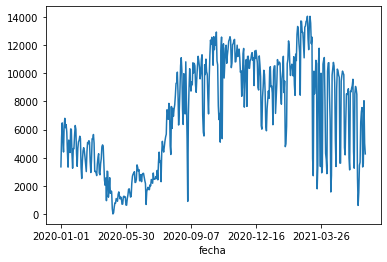

In [17]:
from matplotlib import pyplot
demanda_diaria["salidas"].sum().plot()

# # first we'll do it the default way, with gaps on weekends
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
# ax1.plot(r.date, r.adj_close, 'o-')
# ax1.set_title("Default")
# fig.autofmt_xdate()

pyplot.show()

In [ ]:
# del demanda_horaria
duracion_horaria = datasets["recorridos"]["df"]
duracion_horaria = duracion_horaria.groupby(
    ['origen_nombre', 'origen_id','duracion_mins',]
).agg(
  duracion = ( 'hora',  'count'),
  total = ( 'duracion_mins',  'mean'),
)
demanda_diaria = demanda_diaria.pivot_table(
    index = ['origen_nombre',  'origen_id', ],
    columns = ["horas"],
    values = ["duracion"],
    # aggfunc ='sum',
    fill_value = 0,
).sort_values('origen_id')
demanda_diaria

In [ ]:
## DEMANDA HORARIA
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/


In [18]:
# del demanda_horaria
demanda_horaria = datasets["recorridos"]["df"]
# Fitro x dia
# demanda_horaria = demanda_horaria[demanda_horaria["fecha"] == '2020-01-01' ]
demanda_horaria = demanda_horaria.groupby(
    ['origen_nombre', 'origen_id','hora',]
).agg(
  salidas = ( 'hora',  'count'),
  total = ( 'origen_id',  'count'),
)
demanda_horaria = demanda_horaria.pivot_table(
    index = [ 'origen_nombre',  'origen_id', ],
    columns = ["hora"],
    values = ["salidas"],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
demanda_horaria

# # print(demanda_horaria["salidas"])
# for h in demanda_horaria["salidas"].columns.to_list():
# #     demandas = demanda_horaria["salidas"][h]
#     estaciones = demanda_horaria["salidas"][h].reset_index()
#     for e in estaciones.iterrows():
#         estacion = e[1]
#         estacion_origen =  estacion['origen_id']
#         estacion_salidas =  estacion[h]
#         print(h, estacion_origen, estacion_salidas)
# # demanda_horaria
# for h in demanda_horaria.columns.to_list():
#     demandas = demanda_viz[h]
#     estaciones = demanda_viz[h].reset_index()
#     for e in estaciones.iterrows():
#         estacion = e[1]
#         print(h, estacion)

salidas                                     \
hora                               0    1    2    3    4    5    6    7    
origen_nombre       origen_id                                              
FACULTAD DE DERECHO 1             395  252  148  102   76  151  440  598   
RETIRO I            2              72   30   12    6    5   59  120  255   
ADUANA              3              99   84   44   20   25  167  204  509   
PLAZA ROMA          4              79   41   29   21   13   67  160  238   
PLAZA ITALIA        5             655  533  408  231  129  337  376  807   
...                               ...  ...  ...  ...  ...  ...  ...  ...   
BARRIO 31           393            93   63   27   14   37  466  460  257   
AV. LA PLATA        394             1    2    0    1    0    6   13   41   
AGRONOMIA II        395             7    5    3    3    0   10    0    7   
PLAZA ALBERTI       396           384  323  165   91   50   84  250  384   
GARCIA DEL RIO      399           534  323  208  160   89   99  193  396   

                                           ...                                \
hora                             8     9   ...    14    15    16    17    18   
origen_nombre       origen_id              ...                                 
FACULTAD DE DERECHO 1           938   904  ...  1697  2303  3026  3491  3795   
RETIRO I            2           336   440  ...   563   596   654   780   843   
ADUANA              3           614   601  ...   848   907   844   685   530   
PLAZA ROMA          4           363   433  ...   407   528   625   703   511   
PLAZA ITALIA        5          1197  1044  ...  1917  2299  2695  3017  3124   
...                             ...   ...  ...   ...   ...   ...   ...   ...   
BARRIO 31           393         494   246  ...   342   449   515   647   532   
AV. LA PLATA        394          22    12  ...    37    65    77    95    71   
AGRONOMIA II        395          14    43  ...    28    59    74    63    64   
PLAZA ALBERTI       396         685   838  ...  1168  1435  1527  1777  1940   
GARCIA DEL RIO      399         820  1037  ...  1361  1825  2234  2541  2897   

                                                           
hora                             19    20    21   22   23  
origen_nombre       origen_id                              
FACULTAD DE DERECHO 1          3724  2632  1564  802  519  
RETIRO I            2           397   322   271  153   82  
ADUANA              3           367   260   197  141  147  
PLAZA ROMA          4           350   201   131  125   93  
PLAZA ITALIA        5          2598  2226  1316  932  767  
...                             ...   ...   ...  ...  ...  
BARRIO 31           393         308   238   190  161  111  
AV. LA PLATA        394          43    40    19   11   13  
AGRONOMIA II        395          49    22    29   10    6  
PLAZA ALBERTI       396        1623  1380   970  638  560  
GARCIA DEL RIO      399        2741  2403  1640  942  714  

[236 rows x 24 columns]

In [ ]:
# hora pico
demanda_horaria["salidas"].sum()[ demanda_horaria["salidas"].sum() == demanda_horaria["salidas"].sum().max() ]

In [ ]:
demanda_horaria["salidas"].sum().astype(int)[ demanda_horaria["salidas"].sum() == demanda_horaria["salidas"].sum().min() ]

In [ ]:
# TOTAL HORARIO
# del demanda_horaria
# demanda_horaria = derivados["recorridos"]["df"]
# # Fitro x dia
# # demanda_horaria = demanda_horaria[demanda_horaria["fecha"] == '2020-01-01' ]
# demanda_horaria = demanda_horaria.groupby(
#     ['origen_nombre', 'origen_id','hora',]
# ).agg(
# #   total = ( ['hora','origen_id'],  'count'),
#   salidas = ( 'hora',  'count'),
#   total = ( 'origen_id',  'count'),
# #   fill_values = 0,
# )
# # .reset_index()
# # df.set_index(['id', 'date', 'location'], append=True)
# demanda_horaria = demanda_horaria.pivot_table(
#     index = ['origen_nombre',  'origen_id', "total"],
#     columns = ["hora" ],
#     values = ["salidas","total"],
#     # aggfunc ='sum',
#     fill_value =0,
# ).sort_values('origen_id')
# demanda_horaria

### SUMINISTRO HORARIO




In [ ]:
suministro_horario = derivados["recorridos"]["df"].groupby(
    [ 'destino_nombre',  'destino_id', 'hora' ]
).agg(
  salidas = ( 'hora',  'count'),
)
suministro_horario = suministro_horario.pivot_table(
    index = ['destino_nombre',  'destino_id'],
    columns = "hora",
    values = "salidas",
    # aggfunc = 'sum',
    fill_value = 0,
).sort_values('destino_id')
suministro_horario

## SALIDAS Y ARRIBOS

### TIPO DE RECORRIDO: VUELTA / IDA

### DISTANCIAS


In [ ]:
# !pip install openrouteservice

In [ ]:
# print(len(rutas_calculadas.index))
rutas_calculadas

### Distancias GEOPY

In [ ]:
# derivados["recorridos"]["df"][ derivados["recorridos"]["df"]["vuelta"] == 0 ]

### VELOCIDAD

### Observaciones Horarias

```
$ curl -v --silent https://ssl.smn.gob.ar/dpd/descarga_opendata.php?file=observaciones/datohorario20210518.txt 2>&1 | grep AERO
!curl --silent https://ssl.smn.gob.ar/dpd/descarga_opendata.php?file=observaciones/datohorario20210518.txt | head -n 1
!curl --silent https://ssl.smn.gob.ar/dpd/descarga_opendata.php?file=observaciones/datohorario20210518.txt | grep AEROPARQUE

```

#### Pronostico

```
!curl --silent https://ssl.smn.gob.ar/dpd/descarga_opendata.php?file=pron5d/pron20210101.txt
curl --silent https://ssl.smn.gob.ar/dpd/descarga_opendata.php?file=pron5d/pron20210101.txt | head -n 52
curl --silent https://ssl.smn.gob.ar/dpd/descarga_opendata.php?file=pron5d/pron20210101.txt | head -n 18
```

In [ ]:
derivados["recorridos"]["df"].info()

In [ ]:
# GRUPING USERS
usurios = derivados["recorridos"]["df"].groupby(
    ['usuario_id']
).agg(
  salidas = ( 'destino_id',  'count'),
  vueltas = ( 'vuelta',  'sum'),
  velocidad = ( 'velocidad_kmm',  'max'),
  distancia = ( 'distancia',  'max')
)
# usurios = usurios.pivot_table(
#     index   = [ 'usuario_id'],
#     columns = "salidas",
#     values  = "salidas",
#     # aggfunc = 'count',
# ).sort_values('origen_id')
# demanda_diaria # comprobar

In [ ]:
usurios = usurios[ ~usurios.isin([np.nan, np.inf, -np.inf]).any(1) ]
# usurios
usurios.sort_values( 'velocidad' , ascending = False).head(30)

# Analisis Exploratorio de Datos Espaciales



## Exploratory Spatial Data Analysis (ESDA)

https://alcidanalytics.com/p/geographic-heatmap-in-python

https://alysivji.github.io/getting-started-with-folium.html

https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

In [ ]:
# demanda_viz = derivados["recorridos"]["df"]
# # Fitro x dia

# demanda_viz = demanda_viz[ demanda_viz["fecha"] == '2020-01-01' ]
# demanda_viz

In [ ]:
demanda_viz = derivados["recorridos"]["df"]
# Fitro x dia
fecha_viz   = '2020-03-01'
demanda_viz = demanda_viz[ demanda_viz["fecha"] == fecha_viz ]
demanda_viz = demanda_viz.groupby(
    ['origen_nombre', 'origen_id', 'hora', 'origen_lon','origen_lat']
).agg(
  salidas = ( 'hora',  'count' ),
  nombre  = ( 'origen_nombre',  'first' ),
  id      = ( 'origen_id',  'first' ),
  lon     = ( 'origen_lon',  'first' ),
  lat     = ( 'origen_lat',  'first' ),
)
# ).reset_index()
# df.set_index(['id', 'date', 'location'], append=True)
demanda_viz = demanda_viz.pivot_table(
    index = ['nombre',  'id', 'lon','lat'],
    columns = "hora",
    values = "salidas",
    fill_value = 0,
    # aggfunc = 'sum',
).sort_values('id')

In [ ]:
# import folium
# from folium import plugins
# # import pandas as pd
# # import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

In [ ]:
#... where m is my map object. And 5 is the time (seconds) to render the map.
# https://stackoverflow.com/questions/53565979/export-a-folium-map-as-a-png
# https://blog.ouseful.info/2015/12/15/grabbing-screenshots-of-folium-produced-choropleth-leaflet-maps-using-selenium/
# from time import sleep
import io
from PIL import Image

# !pip install folium selenium
import folium 
from folium.features import DivIcon
import selenium

import math
def mapear(x): 
    return int( (x / 10 ) * 255)



In [ ]:
# del m
m = ''
for h in demanda_viz.columns.to_list():
    del m
    m = folium.Map(
#         [ -34.606499,-58.381094 ], # obelisco
        [-34.606739, -58.435539 ], # parque centenario
        zoom_start = 13,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False
#         tiles='stamentoner'
    )
    folium.map.Marker(
        [ -34.559920, -58.372211 ],
        icon = DivIcon(
            icon_size=(600,400),
            icon_anchor=(0,0),
            html='<div style="font-size: 20pt;font-family: monospace;">' \
            + fecha_viz + ' HORA:' + "{:02d}".format( h ) \
            + '</div>',
        )
    ).add_to(m)
    demandas = demanda_viz[h]
    estaciones = demanda_viz[h].reset_index()
    for e in estaciones.iterrows():
        estacion = e[1]
        folium.CircleMarker(
            [ estacion['lat'], estacion['lon'] ],
            radius = estacion[h] * 5, 
            popup = "{0}\:{1}\demanda:{2}".format(
                estacion['id'],
                estacion['nombre'],
                str(estacion[h]),
            ),
            fill_color = "#{0:02x}{1:02x}{2:02x}".format(
                mapear( int(estacion[h]) ),
                255 - mapear( int(estacion[h]) ) ,
                255 - mapear( int(estacion[h]) )
            )
        ).add_to(m)
#     m.save( 'ESDA/' + fecha_viz + '_' + "{:02d}".format( h ) + '_' + 'map.html')
    
    img_data = m._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    img.save( 'ESDA/' + fecha_viz + '_' + "{:02d}".format( h ) + '_' + 'map.png' )

In [ ]:
# !convert -density 72 'ESDA/2020-03-01_00_map.html' '2020-03-01_00_map.html'


In [ ]:
# !ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -acodec aac ESDA.mp4
!ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -an ESDA.mp4

In [ ]:
# Import the library
from chord import Chord


# Basic cord diagram
# TODO THIS WON'T WORK BECAUSE INPUT TYPE ISNT RECOGNIZE
# Chord(data, names).to_html("../../static/interactiveCharts/chord-diagram-chord-library.html")
matrix = [
    [0, 5, 6, 4, 7, 4],
    [5, 0, 5, 4, 6, 5],
    [6, 5, 0, 4, 5, 5],
    [4, 4, 4, 0, 5, 5],
    [7, 6, 5, 5, 0, 4],
    [4, 5, 5, 5, 4, 0],
]


names = ["Action", "Adventure", "Comedy", "Drama", "Fantasy", "Thriller"]

matrix
[[0, 5, 6, 4, 7, 4],
 [5, 0, 5, 4, 6, 5],
 [6, 5, 0, 4, 5, 5],
 [4, 4, 4, 0, 5, 5],
 [7, 6, 5, 5, 0, 4],
 [4, 5, 5, 5, 4, 0]]

Chord(matrix, names).to_html("../../static/interactiveCharts/chord-diagram-chord-library.html")
%%html
<iframe src="../../interactiveCharts/chord-diagram-chord-library.html"
    width="800"
    height="600"
    title="Chord diagram with the chord library"
    style="border:none"
></iframe>

## reserva

In [ ]:
# # !pip install ffmpeg-python
# import ffmpeg
# # stream = ffmpeg.input('input.mp4')
# # stream = ffmpeg.hflip(stream)
# # stream = ffmpeg.output(stream, 'output.mp4')
# # ffmpeg.run(stream)
# del stream
# stream = ffmpeg.input( 'ESDA/*.png', pattern_type = 'glob', framerate = 24 )
# stream = ffmpeg.output( stream, 'ESDA.mp4')
# ffmpeg.run(stream)


In [ ]:
# import math
# def mapear(x): 
#   return int( (x / 30295 ) * 255) 
# m = folium.Map(
#   [ -34.606499,-58.381094 ],
#   zoom_start = 14
# )
# #  mark each station as a point
# for e in derivados["estaciones"]["df"].iterrows():
#   folium.CircleMarker(
#       [ estacion['lat'], estacion['lon'] ],
#       radius= estacion['salidas'] * 0.002, 
#       popup = "{0}\nsalidas:{1}\narribos:{2}".format(
#           estacion['nombre'],
#           str(estacion['salidas']),
#           str(estacion['arribos'])
#       ),
#       fill_color = "#{0:02x}{1:02x}{2:02x}".format(
#           mapear( int(estacion['salidas']) ),
#           255 - mapear( int(estacion['salidas']) ) ,
#           255 - mapear( int(estacion['salidas']) )
#       )
#   ).add_to(m)
# m

In [ ]:
# # convert to (n, 2) nd-array format for heatmap
# # stationArr = derivados["estaciones"]["df"][['lat', 'lon']].as_matrix()
# # https://stackoverflow.com/a/63293803
# stationArr = derivados["estaciones"]["df"][['salidas']].values

# # plot heatmap
# m.add_children(plugins.HeatMap(stationArr, radius=15))
# m

In [ ]:
"""
We will create a helper function with default keyword arguments to abstact away
Folium's complexity. This leaves us with a simple API we can use going forward.
https://alysivji.github.io/getting-started-with-folium.html
"""
def map_points(
    df,
    lat_col = 'lat',
    lon_col = 'lon',
    zoom_start = 11, 
    plot_points = False,
    pt_radius = 15, 
    draw_heatmap = False,
    heat_map_weights_col = None, 
    heat_map_weights_normalize = False,
    heat_map_radius = 15,
    popup_name = 'nombre'
):
  """
  Creates a map given a dataframe of points. 
  Can also produce a heatmap overlay

  Arg:
    df: dataframe containing points to maps
    lat_col: Column containing latitude (string)
    lon_col: Column containing lonitude (string)
    zoom_start: Integer representing the initial zoom of the map
    plot_points: Add points to map (boolean)
    pt_radius: Size of each point
    draw_heatmap: Add heatmap to map (boolean)
    heat_map_weights_col: Column containing heatmap weights
    heat_map_weights_normalize: Normalize heatmap weights (boolean)
    heat_map_radius: Size of heatmap point
    popup_name: name of the popup

  Returns:
      folium map object
  """

  ## center map in the middle of points center in
  middle_lat = df[lat_col].median()
  middle_lon = df[lon_col].median()

  curr_map = folium.Map(
      location=[middle_lat, middle_lon],
      zoom_start=zoom_start
  )
  cols_to_pull = [ lat_col, lon_col, heat_map_weights_col ]
  # add points to map
  if plot_points:
    for _, row in df.iterrows():
      folium.CircleMarker(
        [ row[lat_col], row[lon_col] ],
        radius = pt_radius,
        popup = row[ popup_name ],
        fill_color = "#3db7e4", # divvy color
      ).add_to( curr_map )
  

  # add heatmap
  if draw_heatmap:
    # convert to (n, 2) or (n, 3) matrix format
    if heat_map_weights_col is None:
      cols_to_pull = [lat_col, lon_col]
    else:
      # if we have to normalize
      if heat_map_weights_normalize:
        df[ heat_map_weights_col] = df[heat_map_weights_col] / df[heat_map_weights_col].sum()
        cols_to_pull = [ lat_col, lon_col, heat_map_weights_col ]
      stations = df[cols_to_pull].values
      curr_map.add_children(
          plugins.HeatMap(
              stations,
              radius = heat_map_radius
          )
      )
  return curr_map

In [ ]:
# del m
m = map_points(
    derivados["estaciones"]["df"],
    plot_points = False,
    draw_heatmap = True,
    heat_map_weights_col = 'salidas',
    heat_map_weights_normalize = True,
)
m

In [ ]:
derivados["recorridos"]["df"].info()

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/drive')

In [ ]:
# Fetch weather from drive
id = '14BpBfjQ3IrfeK8CajCWrEdfPg7S0eqc8'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('weather-data-ba.csv') 
weather_data_df = pd.read_csv('weather-data-ba.csv')
weather_data_df.head()
weather_data_df = weather_data_df.filter(
    ['DATE','PRCP','TAVG']
)
weather_data_df.isnull().sum( axis = 0 )
weather_data_df['PRCP'] = weather_data_df['PRCP'].replace( np.nan, 0 )
weather_data_df.head()

In [ ]:
bicicletas["recorridos_clima_df"].to_csv(
    '/drive/My Drive/Datasets-bicing/recorridos-clima-2020-2021.csv'
)

In [ ]:
bicicletas["recorridos_clima_df"].head()

## Bajar el ultimo
Bajar el dataset limpio desde drive

In [ ]:
from google.colab import files
files.download('recorridos_2020-2021.zip')

In [ ]:
bicicletas["recorridos_df"].to_csv(
    '/drive/My Drive/Datasets-bicing/recorridos_2020-2021.csv'
)

In [ ]:
id = '17liAPD1lyj2wT-Hcbh4ed9-Cn4peoyIq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('recorridos_2020-2021.csv') 
bicicletas["recorridos_df"] = pd.read_csv('recorridos_2020-2021.csv')
bicicletas["recorridos_df"].head()